<a href="https://colab.research.google.com/github/Dileepsingh6432/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation.



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** - Mohammad Irfan
##### **Team Member 2 -** - Vishal Singh
##### **Team Member 3 -** - Dileep Singh
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
# df=pd.read_csv('/content/drive/MyDrive/online retail/Online Retail.xlsx - Online Retail.csv')

df=pd.read_csv('/content/drive/MyDrive/Online Retail.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print('The number of rows in data is:',df.shape[0])
print('The number of columns in data is',len(list(df.columns)))

The number of rows in data is: 541909
The number of columns in data is 8


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate_rows_in_retail_data = df.duplicated().sum()
print('The number of duplicates in retail data is:',duplicate_rows_in_retail_data)

The number of duplicates in retail data is: 5268


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

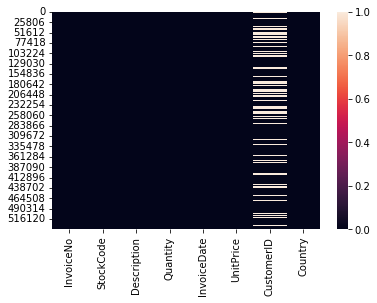

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=True)


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print(list(df.columns))

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [11]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description 

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f'The unique values in {col} are {df[col].unique()}' )

The unique values in InvoiceNo are ['536365' '536366' '536367' ... '581585' '581586' '581587']
The unique values in StockCode are ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
The unique values in Description are ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
The unique values in Quantity are [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df.CustomerID.count()

406829

In [14]:
num_unique_ids = len(df['CustomerID'].unique())
num_unique_ids

4373

In [15]:
#checking customer with respect to the country
cust_count =pd.DataFrame(df.groupby(['Country'])['CustomerID'].value_counts(ascending=False))
cust_count

CustomerID
Country        CustomerID            
Australia      12415.0            778
               12431.0            186
               12388.0            100
               12393.0             64
               12434.0             54
...                               ...
United Kingdom 18233.0              1
Unspecified    12743.0            134
               16320.0             56
               14265.0             31
               12363.0             23

[4380 rows x 1 columns]

In [16]:
#checking top country
country_count=df['Country'].value_counts().reset_index()
country_count.rename(columns={'index': 'Country_Name'}, inplace=True)
country_count.rename(columns={'Country': 'Count'}, inplace=True)
country_count.head()

,Country_Name,Count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


In [17]:
#Converting object type to datetime for InvoiceDate and checking first and last dates
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
print("Minimum Invoice Date", min(df["InvoiceDate"]))
print("Maximum Invoice Date", max(df["InvoiceDate"]))

Minimum Invoice Date 2010-12-01 08:26:00
Maximum Invoice Date 2011-12-09 12:50:00


In [18]:
#checking min and max unit price
print("Minimum UnitPrice", min(df["UnitPrice"]))
print("Maximum UnitPrice", max(df["UnitPrice"]))
df["UnitPrice"].describe()

Minimum UnitPrice -11062.06
Maximum UnitPrice 38970.0


count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [19]:
#lets check any negative price
df[df.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [20]:
#removing negative unit price.
df = df[df.UnitPrice >= 0]
df[df.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [21]:
#checking unit price==0
df[df.UnitPrice==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [22]:
#price==0 % of data 
print("% of data with Price zero: ", round(len(df[df.UnitPrice == 0]) * 100 / len(df),2),"%" )
#lets check how many id associated with unit price=0
print(" total id associated with unit price=0 : ", df[df.UnitPrice==0].CustomerID.nunique())

% of data with Price zero:  0.46 %
 total id associated with unit price=0 :  31


In [23]:
#Dropping Cases with UnitPrice = 0
df = df[df.UnitPrice >0]
df["UnitPrice"].describe()

count    539392.000000
mean          4.673648
std          94.614722
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [24]:
df["Quantity"].describe()

count    539392.000000
mean          9.845904
std         215.412652
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [25]:
df[df.Quantity<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [26]:
#removing negative value


In [27]:
unique_countries = df['Country'].unique()

# Print the unique values of the 'Country' column
print(unique_countries)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [28]:
df['Country'] = df['Country'].replace('EIRE', 'IRELAND')

In [29]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2365
REGENCY CAKESTAND 3 TIER              2198
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1726
LUNCH BAG RED RETROSPOT               1638
                                      ... 
WALL ART , THE MAGIC FOREST              1
S/4 BLACK DISCO PARTITION PANEL          1
FIRE POLISHED GLASS NECKL GOLD           1
CREAM SWEETHEART TRAYS                   1
OOH LA LA DOGS COLLAR                    1
Name: Description, Length: 4042, dtype: int64

In [30]:
#counting description
Description_count=df['Description'].value_counts().reset_index()
Description_count.rename(columns={'index': 'Product_Description'}, inplace=True)
Description_count.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_count.head()
#Description_count

,Product_Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2365
1,REGENCY CAKESTAND 3 TIER,2198
2,JUMBO BAG RED RETROSPOT,2156
3,PARTY BUNTING,1726
4,LUNCH BAG RED RETROSPOT,1638


In [31]:
#which customer buy maximum
customer_order_sum=pd.DataFrame(df.groupby("CustomerID")["Quantity"].sum().reset_index().sort_values(by="Quantity" ,ascending=False ))
customer_order_sum.head(5)


,CustomerID,Quantity
1702,14646.0,196143
55,12415.0,76946
1894,14911.0,76930
3757,17450.0,69029
4232,18102.0,64122


In [32]:
#stock code
top_selling_stock=pd.DataFrame(df.groupby(['StockCode'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ))
top_selling_stock.head(5)


,StockCode,Quantity
1112,22197,56450
2916,84077,53847
3401,85099B,47359
3202,84879,36381
440,21212,36039


In [33]:

#converting invoice date column to date time formate
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], "format = %Y-%m-%d %H:%M:%S")
# Create a new column named 'Day' in the dataframe
df['Day'] = df['InvoiceDate'].dt.day_name()
# Create a new column named 'Month' in the dataframe
df['Month'] = df['InvoiceDate'].dt.month_name()
# Create a new column named 'Year' in the  dataframe
df['Year'] = df['InvoiceDate'].dt.year

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Bar plot of top five customer

<AxesSubplot:title={'center':'Day'}, xlabel='CustomerID', ylabel='Quantity'>

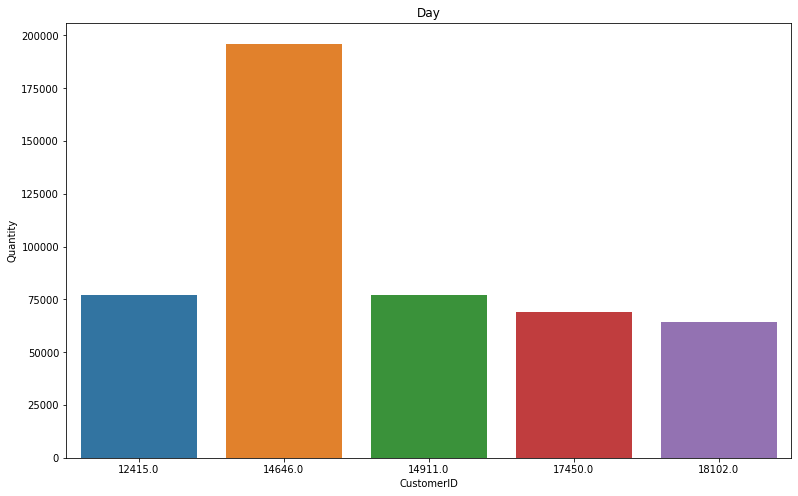

In [34]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='CustomerID',y='Quantity',data=customer_order_sum.head(5))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2-Bar plot of top 5 product

In [35]:
Description_count

,Product_Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2365
1,REGENCY CAKESTAND 3 TIER,2198
2,JUMBO BAG RED RETROSPOT,2156
3,PARTY BUNTING,1726
4,LUNCH BAG RED RETROSPOT,1638
...,...,...
4037,"WALL ART , THE MAGIC FOREST",1
4038,S/4 BLACK DISCO PARTITION PANEL,1
4039,FIRE POLISHED GLASS NECKL GOLD,1
4040,CREAM SWEETHEART TRAYS,1


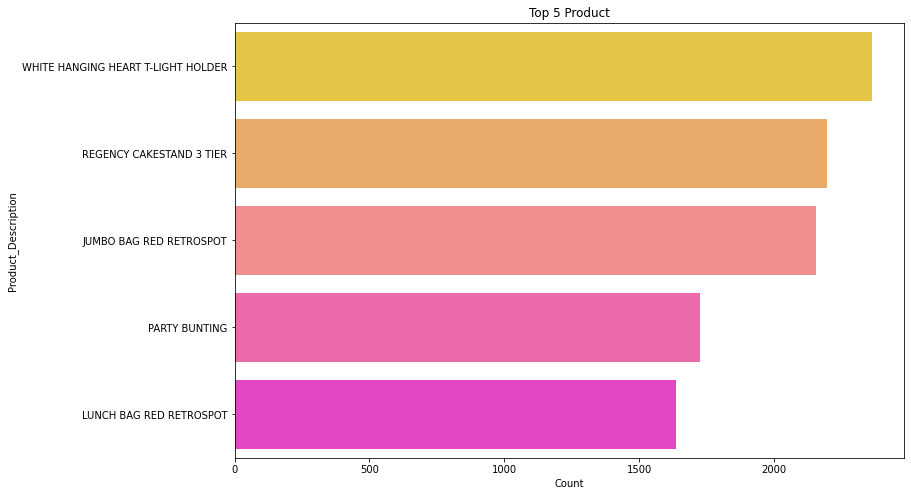

In [36]:
# Chart - 2 visualization code
plt.figure(figsize=(12,8))
plt.title('Top 5 Product')
sns.barplot(x='Count',y='Product_Description',data=Description_count[:5], palette='spring_r');

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<AxesSubplot:title={'center':'top country'}, xlabel='Country_Name', ylabel='Count'>

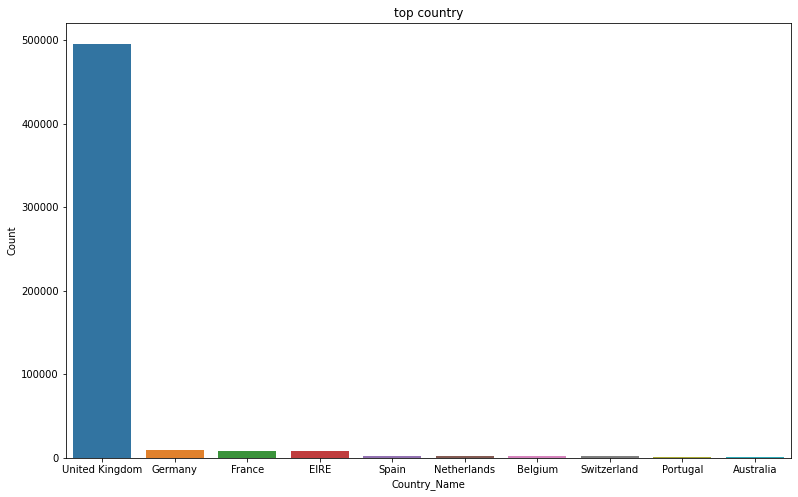

In [37]:
# Chart - 3 visualization code
plt.figure(figsize=(13,8))
plt.title('top country')
sns.barplot(x='Country_Name',y='Count',data=country_count.head(10))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4-Bar plot of top 5 stock

In [38]:
top_selling_stock.head(5)

,StockCode,Quantity
1112,22197,56450
2916,84077,53847
3401,85099B,47359
3202,84879,36381
440,21212,36039


<AxesSubplot:title={'center':'top 5 stock'}, xlabel='StockCode', ylabel='Quantity'>

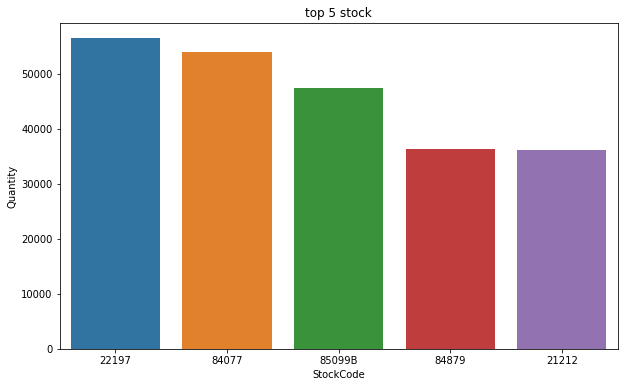

In [39]:
#chart3
plt.figure(figsize=(10,6))
plt.title('top 5 stock')
sns.barplot(x='StockCode',y='Quantity',data=top_selling_stock.head(5))


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 Busiest Day of the Week (Bivariate)

In [40]:
# Find the busiest day of the week using the groupby operation using the day and Invoice number
busiest_date=df.groupby('Day')['InvoiceNo'].count().sort_values(ascending=False).reset_index()
busiest_date

,Day,InvoiceNo
0,Thursday,103362
1,Tuesday,101208
2,Monday,94756
3,Wednesday,94044
4,Friday,81652
5,Sunday,64370


Text(0, 0.5, 'Number of Customers')

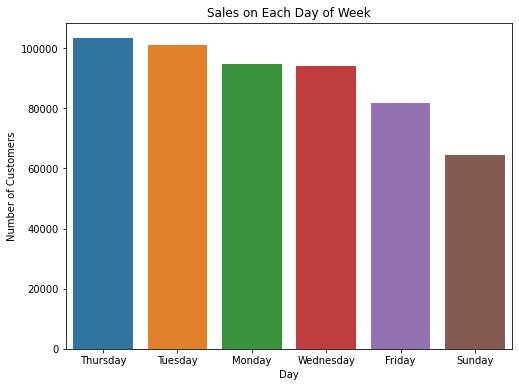

In [41]:
# Chart - 5 visualization code

# busiest_date.plot(kind='bar')
plt.figure(figsize=(8,6))
sns.barplot(x=busiest_date['Day'], y=busiest_date['InvoiceNo'])
plt.title('Sales on Each Day of Week')
plt.ylabel('Number of Customers')

##### 1. Why did you pick the specific chart?

To find the busiest days of the week.

##### 2. What is/are the insight(s) found from the chart?

The stores are getting high traffic on Thursday followed by Tuesday, and least traffic on sunday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will definitely help to create positive impact.

#### Chart - 6 Busiest Months of year (Bivariate)

In [42]:
busiest_months=df.groupby('Month')['InvoiceNo'].count().sort_values(ascending=False).reset_index().rename(columns={'InvoiceNo': 'Distinct_No_of_Customers'})
busiest_months

,Month,Distinct_No_of_Customers
0,November,84445
1,December,67679
2,October,60504
3,September,50066
4,July,39330
5,May,36785
6,June,36688
7,March,36502
8,August,35151
9,January,35007


Text(0.5, 1.0, 'Busiest Months')

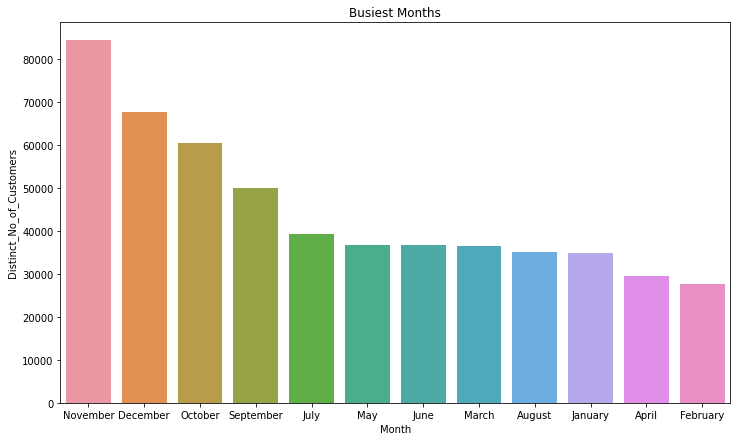

In [43]:
# Chart - 6 visualization code
plt.figure(figsize=(12,7))
sns.barplot(x=busiest_months['Month'],y=busiest_months['Distinct_No_of_Customers'])
plt.title('Busiest Months')


##### 1. Why did you pick the specific chart?

To find out the busiest month of the year.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clear that the busiest month is November, and least busiest month is February.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will lead us in creating positive business impact.

#### Chart - 7

In [44]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010


In [45]:
df.UnitPrice.nunique()

1628

In [46]:
date_wise_sales = df[(df['Quantity'] > 0) & (df['Quantity'] < 40000) ].groupby('InvoiceDate')['Quantity'].sum().reset_index()
date_wise_sales

,InvoiceDate,Quantity
0,2010-12-01 08:26:00,40
1,2010-12-01 08:28:00,12
2,2010-12-01 08:34:00,98
3,2010-12-01 08:35:00,3
4,2010-12-01 08:45:00,449
...,...,...
18492,2011-12-09 12:23:00,76
18493,2011-12-09 12:25:00,120
18494,2011-12-09 12:31:00,278
18495,2011-12-09 12:49:00,66


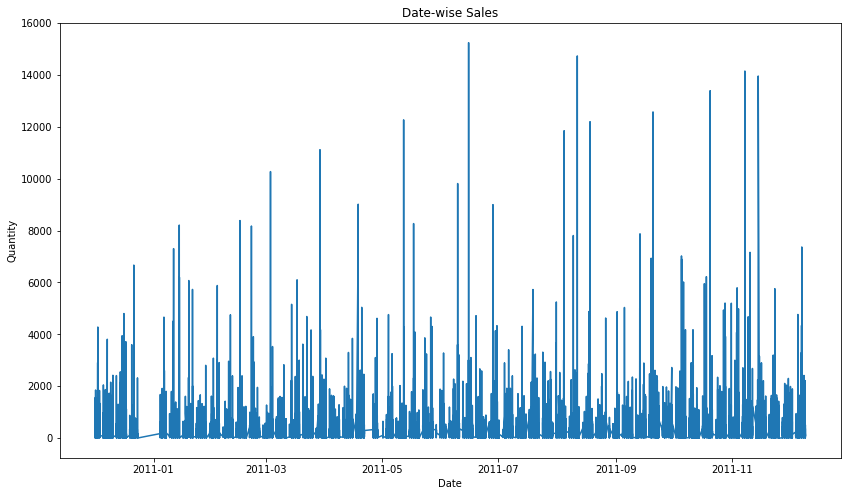

In [47]:
# Chart - 7 visualization code

# # create a line plot of date-wise sales
plt.figure(figsize=(14,8))
sns.lineplot(x='InvoiceDate', y='Quantity', data=date_wise_sales)
plt.title('Date-wise Sales')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 Most Frequent Customers considering the customerID and InvoiceNo(Bivariate)

In [48]:
frequent_customers=df.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False)
frequent_customers

CustomerID
17841.0    7983
14911.0    5901
14096.0    5128
12748.0    4641
14606.0    2782
           ... 
15753.0       1
14119.0       1
16579.0       1
13120.0       1
15070.0       1
Name: InvoiceNo, Length: 4371, dtype: int64

Text(0, 0.5, 'Distinct Number of Invoices')

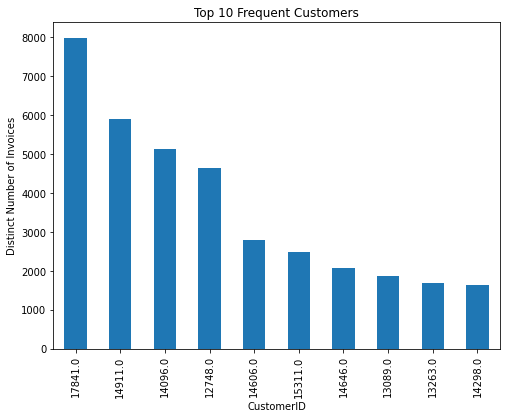

In [49]:
# Chart - 8 visualization code
plt.figure(figsize=(8,6))
frequent_customers.head(10).plot(kind='bar')
plt.title('Top 10 Frequent Customers')
plt.ylabel('Distinct Number of Invoices')

##### 1. Why did you pick the specific chart?

To find the most frequent customers.

##### 2. What is/are the insight(s) found from the chart?

We found out that the most frequent customer is 17841 followed by 14911.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight from the above bar plot will help us recognize the valued customers. And this will help us create a positive business impact.

#### Chart - 9 Highest number of Quantities Purchased by top 5 Countries (Bivariate)

In [50]:
quantities_purchased_by_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index().head(5)
quantities_purchased_by_countries

,Country,Quantity
0,United Kingdom,4399357
1,Netherlands,199552
2,IRELAND,142363
3,Germany,117446
4,France,110479


Text(0.5, 1.0, 'Top 5 Countries where most Qunatities are Sold')

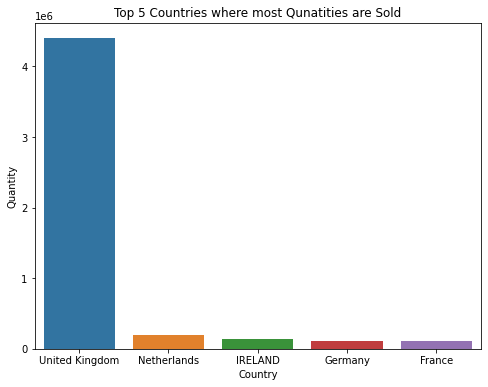

In [51]:
# Chart - 9 visualization code
plt.figure(figsize=(8,6))
sns.barplot(x=quantities_purchased_by_countries['Country'],y=quantities_purchased_by_countries['Quantity'])
plt.title("Top 5 Countries where most Qunatities are Sold")


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [52]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010


In [53]:
# Chart - 10 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [54]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [55]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [56]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [57]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [58]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [59]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [61]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [62]:
# Handling Missing Values & Missing Value Imputation
print(np.sum(df.isnull()), "\n")
print("Percentage of customers id missing: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132603
Country             0
Day                 0
Month               0
Year                0
dtype: int64 

Percentage of customers id missing:  24.58 %


here missing value are 25% of whole data so we cant remove them from our data  set

In [63]:
# Create a variable 'cancelled_orders' to store all the rows in 'retail_df' where the value in the 'InvoiceNo' column contains the character 'C'
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]

# Display the first 5 rows of 'cancelled_orders' dataframe
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Wednesday,December,2010
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Wednesday,December,2010
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wednesday,December,2010
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Wednesday,December,2010
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Wednesday,December,2010


it looks like negative quantity related to the cancel order

In [64]:
#finding total cancel order
print("Percentage of cancel order: ", round(len(cancelled_orders) * 100 / df['InvoiceNo'].nunique(),2),"%" )

Percentage of cancel order:  39.03 %


In [65]:
df2=df.copy()

In [66]:
df.shape

(539392, 11)

In [67]:
# Filter the copied dataframe to only include rows where the 'Quantity' column is greater than 0
df2 = df2[df2['Quantity'] > 0]

# Check the shape of the filtered dataframe
print("Number of rows:", df2.shape[0], "Number of columns:", df2.shape[1])

Number of rows: 530104 Number of columns: 11


In [68]:
#checking whether we are right
cancelled_orders = df2[df2['InvoiceNo'].astype(str).str.contains('C')]

# Display the first 5 rows of 'cancelled_orders' dataframe
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year


In [69]:
# Remove all rows with missing values in the CustomerID
#df2.dropna(subset=['CustomerID'], how='all', inplace=True)
#(397884, 11)
# the shape of the updated dataframe
#dropping null values
df2.dropna(inplace=True)
print(df2.shape)

(397884, 11)


In [70]:
print(np.sum(df2.isnull()), "\n")

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Day            0
Month          0
Year           0
dtype: int64 



#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

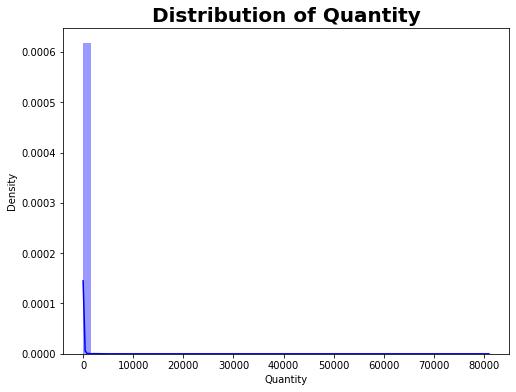

In [71]:
#Distribution of Quantity
# Set the figure size for the plot
plt.figure(figsize=(8,6))
# Set the plot title
plt.title('Distribution of Quantity', size=20, fontweight='bold')

# Plot the distribution of Quantity data
sns.distplot(df2['Quantity'], color='blue')

# Display the plot
plt.show()

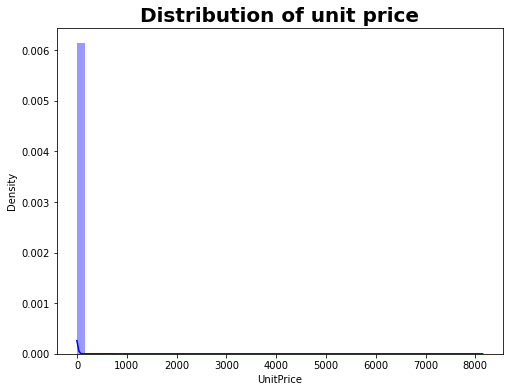

In [72]:
#Distribution of unit price
# Set the figure size for the plot
plt.figure(figsize=(8,6))
# Set the plot title
plt.title('Distribution of unit price', size=20, fontweight='bold')

# Plot the distribution of Quantity data
sns.distplot(df2['UnitPrice'], color='blue')

# Display the plot
plt.show()

In [73]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [74]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [75]:
# Expand Contraction

#### 2. Lower Casing

In [76]:
# Lower Casing

#### 3. Removing Punctuations

In [77]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [78]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [79]:
# Remove Stopwords

In [80]:
# Remove White spaces

#### 6. Rephrase Text

In [81]:
# Rephrase Text

#### 7. Tokenization

In [82]:
# Tokenization

#### 8. Text Normalization

In [83]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [84]:
# POS Taging

#### 10. Text Vectorization

In [85]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [86]:
df2.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010


In [87]:
# create a new column 'total_cost' in the dataframe
df2['total_cost'] = df2['Quantity'] * df2['UnitPrice']

In [88]:
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,22.00


**Recency,Frequency and Monetary analysis**

In [89]:
# Import the datetime module as "dt" for easier use
import time
import datetime as dt

In [90]:
# Getting the latest value of the 'InvoiceDate' column
latest_date = df2['InvoiceDate'].max()

# Output the result
print(latest_date)

2011-12-09 12:50:00


In [91]:
# Calculate recency
recency_df = df2.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['recency'] = (latest_date - recency_df['InvoiceDate']).dt.days

In [92]:
# Calculate frequency
frequency_df = df2.groupby('CustomerID')['InvoiceDate'].count().reset_index()
frequency_df = frequency_df.rename(columns={'InvoiceDate': 'frequency'})

In [93]:
# Calculate monetary
monetary_df = df2.groupby('CustomerID')['total_cost'].sum().reset_index()
monetary_df.rename(columns={'total_cost': 'Monetary'}, inplace=True)

In [94]:
# Combine the RFM values into a single dataframe
rfm_df = pd.merge(recency_df, frequency_df, on='CustomerID')
rfm_df = pd.merge(rfm_df, monetary_df, on='CustomerID')

In [95]:
rfm_df.head(5)

,CustomerID,InvoiceDate,recency,frequency,Monetary
0,12346.0,2011-01-18 10:01:00,325,1,77183.60
1,12347.0,2011-12-07 15:52:00,1,182,4310.00
2,12348.0,2011-09-25 13:13:00,74,31,1797.24
3,12349.0,2011-11-21 09:51:00,18,73,1757.55
4,12350.0,2011-02-02 16:01:00,309,17,334.40


In [96]:
# Define the quartile cutoffs
quartiles = rfm_df[['recency', 'frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])

# Assign scores to each value based on quartile cutoffs
def r_score(x, c):
    if x <= c[0.25]:
        return 1
    elif x <= c[0.5]:
        return 2
    elif x <= c[0.75]: 
        return 3
    else:
        return 4

In [97]:
def fm_score(x, c):
    if x <= c[0.25]:
        return 4
    elif x <= c[0.5]:
        return 3
    elif x <= c[0.75]: 
        return 2
    else:
        return 1

In [98]:
rfm_df['r_score'] = rfm_df['recency'].apply(r_score, c=quartiles['recency'])
rfm_df['f_score'] = rfm_df['frequency'].apply(fm_score, c=quartiles['frequency'])
rfm_df['m_score'] = rfm_df['Monetary'].apply(fm_score, c=quartiles['Monetary'])

In [99]:
rfm_df.head(5)

,CustomerID,InvoiceDate,recency,frequency,Monetary,r_score,f_score,m_score
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,4,4,1
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,1,1,1
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,3,3,1
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,2,2,1
4,12350.0,2011-02-02 16:01:00,309,17,334.40,4,4,3


In [100]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.r_score.map(str) + rfm_df.f_score.map(str) + rfm_df.m_score.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['r_score', 'f_score', 'm_score']].sum(axis = 1)
rfm_df.head()

,CustomerID,InvoiceDate,recency,frequency,Monetary,r_score,f_score,m_score,RFMGroup,RFMScore
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,4,4,1,441,9
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,1,1,1,111,3
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,3,3,1,331,7
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,2,2,1,221,5
4,12350.0,2011-02-02 16:01:00,309,17,334.40,4,4,3,443,11


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

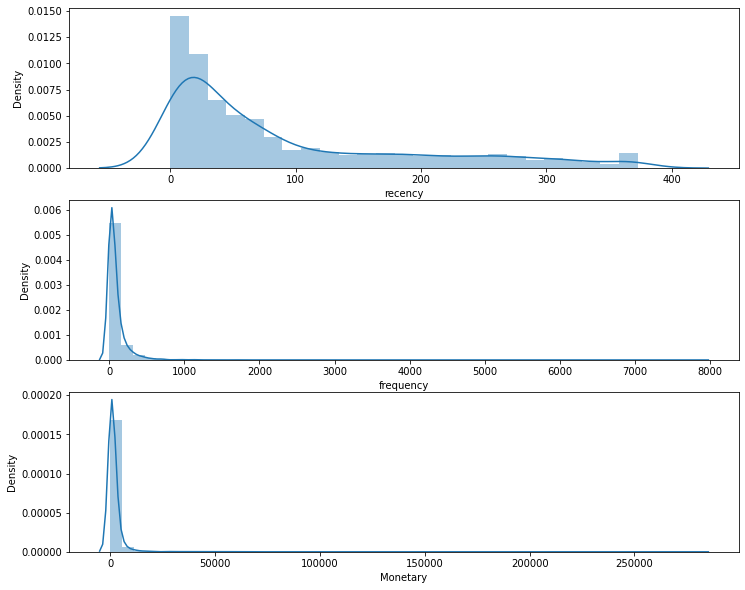

In [101]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm_df['recency'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm_df['frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary'])

#### 2. Feature Selection

In [102]:
# Select your features wisely to avoid overfitting


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [103]:
# Transform Your data
from sklearn import preprocessing
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['recency'] = [handle_neg_n_zero(x) for x in rfm_df.recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]


In [104]:
#appkying log transformation
rfm_df['recency_log'] = rfm_df['recency'].apply(math.log)
rfm_df['frequency_log'] = rfm_df['frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

<AxesSubplot:xlabel='Monetary_log', ylabel='Density'>

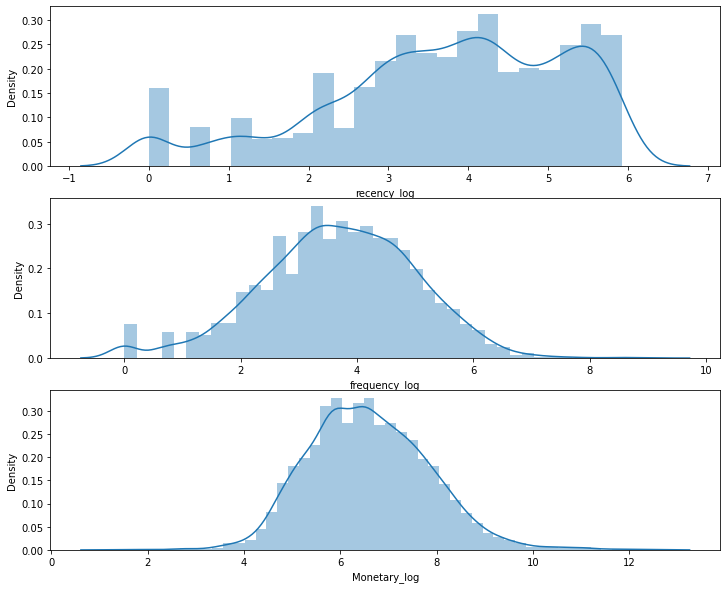

In [105]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(rfm_df['recency_log'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(rfm_df['frequency_log'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary_log'])

In [106]:
rfm_df.head(5)

,CustomerID,InvoiceDate,recency,frequency,Monetary,r_score,f_score,m_score,RFMGroup,RFMScore,recency_log,frequency_log,Monetary_log
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,4,4,1,441,9,5.783825,0.000000,11.253942
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,1,1,1,111,3,0.000000,5.204007,8.368693
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,3,3,1,331,7,4.304065,3.433987,7.494007
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676
4,12350.0,2011-02-02 16:01:00,309,17,334.40,4,4,3,443,11,5.733341,2.833213,5.812338


### 6. Data Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
# Scaling your data
# Define the features to use for K-means
columns = ['recency_log', 'frequency_log', 'Monetary_log']

# Standardize the feature values
scaler = StandardScaler()
rfm_df[columns] = scaler.fit_transform(rfm_df[columns].values)

In [109]:
rfm_df.head(5)

,CustomerID,InvoiceDate,recency,frequency,Monetary,r_score,f_score,m_score,RFMGroup,RFMScore,recency_log,frequency_log,Monetary_log
0,12346.0,2011-01-18 10:01:00,325,1,77183.60,4,4,1,441,9,1.373353,-2.775160,3.698719
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,1,1,1,111,3,-2.451384,1.149549,1.410201
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,3,3,1,331,7,0.394815,-0.185347,0.716419
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,2,2,1,221,5,-0.540035,0.460579,0.698706
4,12350.0,2011-02-02 16:01:00,309,17,334.40,4,4,3,443,11,1.339969,-0.638433,-0.617446


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [110]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [111]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [112]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1-K-Means Clustering

In [113]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [114]:
rfm_df.isna().sum()

CustomerID       0
InvoiceDate      0
recency          0
frequency        0
Monetary         0
r_score          0
f_score          0
m_score          0
RFMGroup         0
RFMScore         0
recency_log      0
frequency_log    0
Monetary_log     0
dtype: int64

 #### 1.Applying Silhouette Score Method on Recency frequency and Monetary

In [115]:
#assigning features
features_rec_mon=['recency_log','Monetary_log', 'frequency_log']
X=rfm_df[features_rec_mon]

In [116]:
from typing import Tuple
def cluster_eval_score(X: pd.DataFrame, range_n_clusters: Tuple[int, int]) -> pd.DataFrame:
    """
    This function evaluates the silhouette score for different numbers of clusters using KMeans.

    Parameters:
    X (pandas DataFrame): Input data.
    range_n_clusters (tuple): Range of numbers of clusters to evaluate.

    Returns:
    eval_score (pandas DataFrame): DataFrame containing the silhouette score for each number of clusters.
    """

    eval_score = pd.DataFrame(columns=['n_clusters', 'silhouette_score'])

    for n_clusters in range(range_n_clusters[0], range_n_clusters[1]+1):
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(X)
        centers = clusterer.cluster_centers_

        score = silhouette_score(X, preds)
        eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    return eval_score


In [117]:
eval_score = cluster_eval_score(X, (2, 15))


For n_clusters = 2, silhouette score is 0.3954077027323695
For n_clusters = 3, silhouette score is 0.3064635439770853
For n_clusters = 4, silhouette score is 0.30406547212863116
For n_clusters = 5, silhouette score is 0.27976610878689356
For n_clusters = 6, silhouette score is 0.2797970682204901
For n_clusters = 7, silhouette score is 0.2682090688450045
For n_clusters = 8, silhouette score is 0.26698213728213965
For n_clusters = 9, silhouette score is 0.2524888207091305
For n_clusters = 10, silhouette score is 0.2687225532558359
For n_clusters = 11, silhouette score is 0.27359015988234764
For n_clusters = 12, silhouette score is 0.26363923921127874
For n_clusters = 13, silhouette score is 0.26469625892412973
For n_clusters = 14, silhouette score is 0.2563080232420895
For n_clusters = 15, silhouette score is 0.2568117315951322


In [118]:
eval_score.columns = ['n_clusters', 's_score']
eval_score = eval_score.reset_index(drop = False)
eval_score.head()

,index,n_clusters,s_score
0,0,2.0,0.395408
1,1,3.0,0.306464
2,2,4.0,0.304065
3,3,5.0,0.279766
4,4,6.0,0.279797


In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<AxesSubplot:xlabel='n_clusters', ylabel='s_score'>

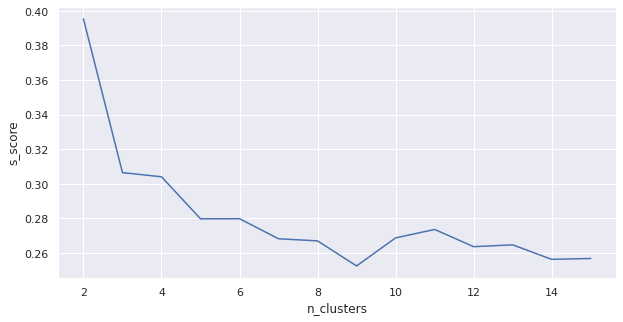

In [120]:
plt.figure(figsize= (10,5))
sns.lineplot(data = eval_score, x = 'n_clusters', y= 's_score')

 #### 2.Applying Silhouette Score Method on Recency and monetary

In [121]:
features_rec_mon=['recency_log','Monetary_log']
X1=rfm_df[features_rec_mon]

In [122]:
eval_score = cluster_eval_score(X1, (2, 15))


For n_clusters = 2, silhouette score is 0.4216697637519617
For n_clusters = 3, silhouette score is 0.34776984487081414
For n_clusters = 4, silhouette score is 0.36514588011323923
For n_clusters = 5, silhouette score is 0.3393621568210311
For n_clusters = 6, silhouette score is 0.34514336290443504
For n_clusters = 7, silhouette score is 0.34778052097043277
For n_clusters = 8, silhouette score is 0.3392145749334576
For n_clusters = 9, silhouette score is 0.3458003270633241
For n_clusters = 10, silhouette score is 0.3491912664828195
For n_clusters = 11, silhouette score is 0.3387120214818273
For n_clusters = 12, silhouette score is 0.3458895131409033
For n_clusters = 13, silhouette score is 0.34390346342567746
For n_clusters = 14, silhouette score is 0.3356611143990575
For n_clusters = 15, silhouette score is 0.3399326696486931


 #### 3.Applying Silhouette Score Method on frequency and Monetary

In [123]:
features_rec_mon=['frequency_log','Monetary_log']
X2=rfm_df[features_rec_mon]

In [124]:
eval_score = cluster_eval_score(X2, (2, 15))


For n_clusters = 2, silhouette score is 0.47853570950660274
For n_clusters = 3, silhouette score is 0.40764120562174433
For n_clusters = 4, silhouette score is 0.3718772408815943
For n_clusters = 5, silhouette score is 0.3450509118123957
For n_clusters = 6, silhouette score is 0.3601533467427302
For n_clusters = 7, silhouette score is 0.34234227901248115
For n_clusters = 8, silhouette score is 0.35165988665679676
For n_clusters = 9, silhouette score is 0.34594946092168477
For n_clusters = 10, silhouette score is 0.3590805633951275
For n_clusters = 11, silhouette score is 0.3689925360243177
For n_clusters = 12, silhouette score is 0.35408062565231385
For n_clusters = 13, silhouette score is 0.36010240083640493
For n_clusters = 14, silhouette score is 0.3567004244809071
For n_clusters = 15, silhouette score is 0.3673444312853682


In [125]:
from typing import Tuple
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def cluster_eval_score(X: pd.DataFrame, range_n_clusters: Tuple[int, int]) -> pd.DataFrame:
    """
    This function evaluates the silhouette score for different numbers of clusters using KMeans.

    Parameters:
    X (pandas DataFrame): Input data.
    range_n_clusters (tuple): Range of numbers of clusters to evaluate.

    Returns:
    eval_score (pandas DataFrame): DataFrame containing the silhouette score for each number of clusters.
    """

    eval_score = pd.DataFrame(columns=['n_clusters', 'silhouette_score'])

    for n_clusters in range(range_n_clusters[0], range_n_clusters[1]+1):
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(X)
        centers = clusterer.cluster_centers_

        score = silhouette_score(X, preds)
        eval_score = eval_score.append({'n_clusters': n_clusters, 'silhouette_score': score}, ignore_index=True)
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

        # Plot scatter plot of the clusters
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 6)
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=preds, cmap=plt.cm.nipy_spectral)
        ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=200,
                    linewidths=3, color='black', zorder=10)
        ax.set_title("KMeans Clustering with {} Clusters".format(n_clusters))
        plt.show()

    return eval_score


For n_clusters = 2, silhouette score is 0.4786283746750538


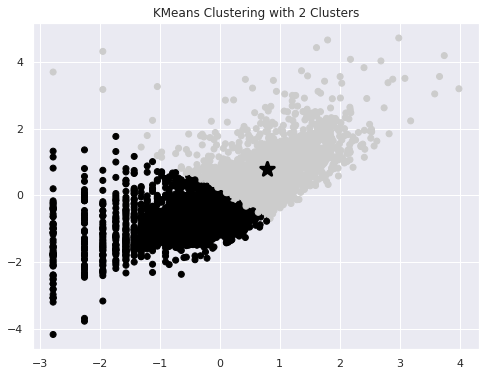

For n_clusters = 3, silhouette score is 0.40761186766842655


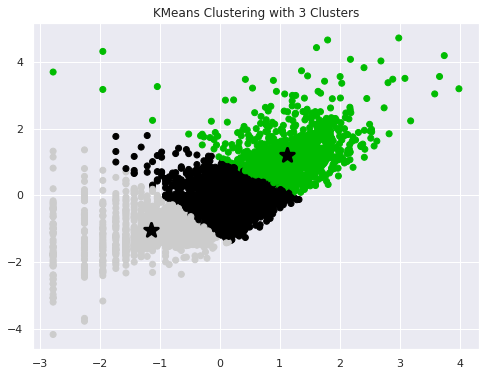

For n_clusters = 4, silhouette score is 0.3713268521754508


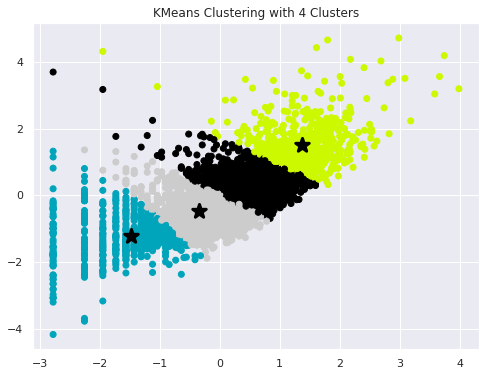

For n_clusters = 5, silhouette score is 0.34259810666113366


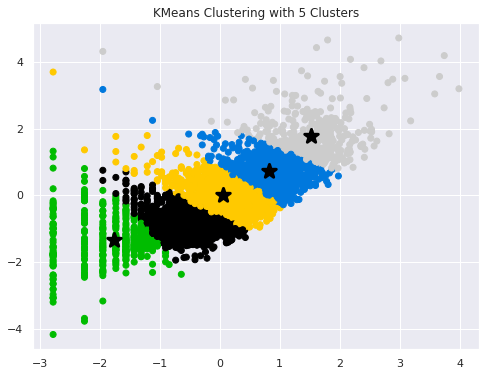

For n_clusters = 6, silhouette score is 0.35868292199473845


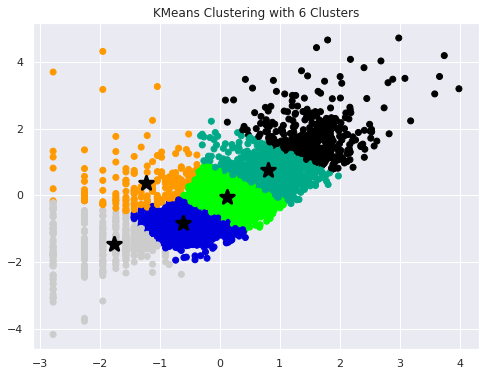

For n_clusters = 7, silhouette score is 0.33878763251914834


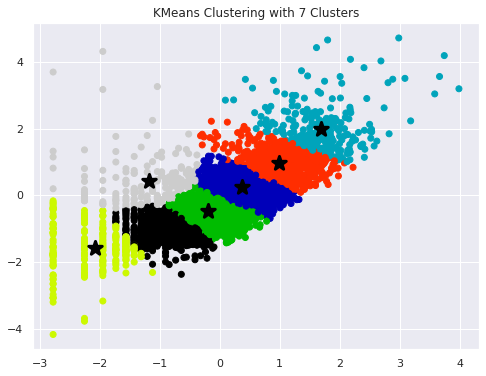

For n_clusters = 8, silhouette score is 0.35017488169322847


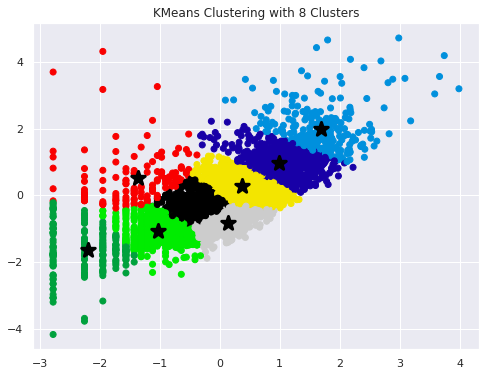

For n_clusters = 9, silhouette score is 0.34615231001256386


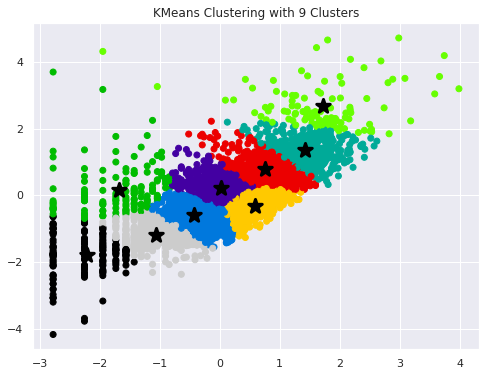

For n_clusters = 10, silhouette score is 0.36123524198349344


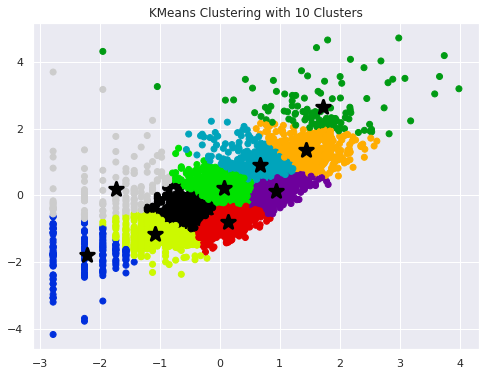

For n_clusters = 11, silhouette score is 0.3413074595160051


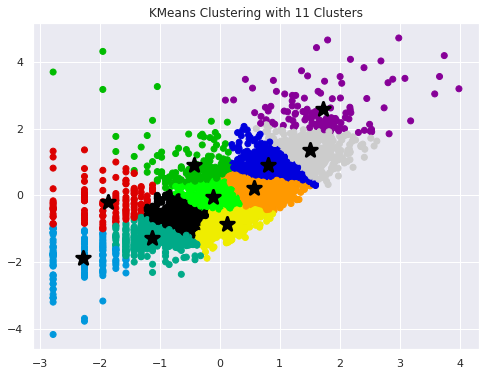

For n_clusters = 12, silhouette score is 0.3537020195211264


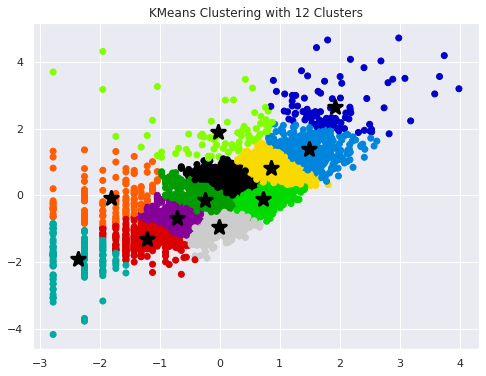

For n_clusters = 13, silhouette score is 0.3615600085146436


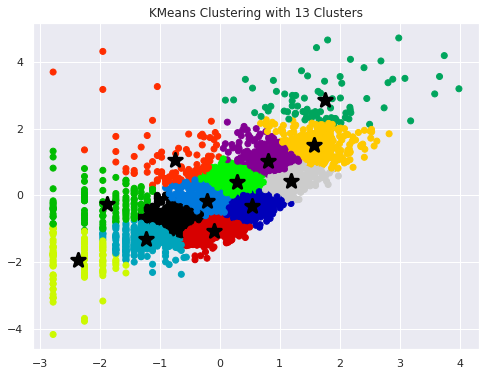

For n_clusters = 14, silhouette score is 0.34820559800171647


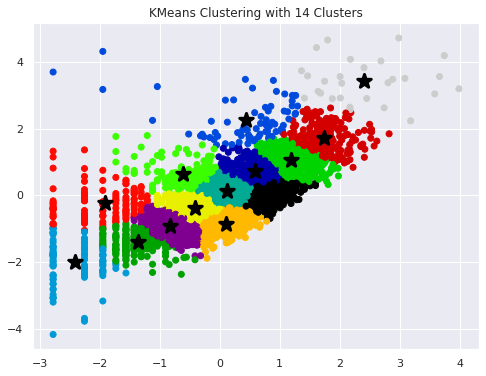

For n_clusters = 15, silhouette score is 0.3617080500546851


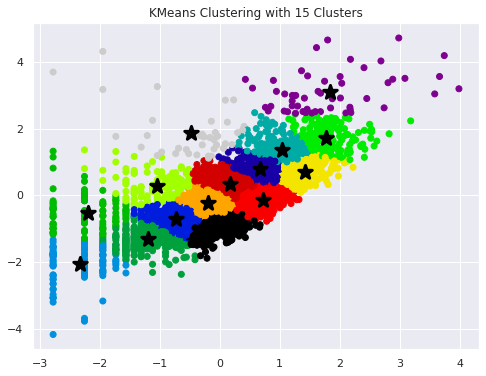

In [126]:
eval_score = cluster_eval_score(X2, (2, 15))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-means clustering is a popular unsupervised machine learning technique used to cluster similar data points together based on their attributes. It is an iterative algorithm that aims to minimize the sum of squared distances between each data point and its assigned cluster centroid.

The output of the algorithm is K cluster centroids and the assignment of each data point to its corresponding cluster.

K-means is a simple and efficient clustering algorithm that works well on large datasets. However, it is sensitive to the initial placement of the centroids, and the optimal number of clusters may not always be known in advance.

In [127]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [128]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2-Applying Elbow Method

 #### 1.Applying Elbow Method on Recency,frequency and Monetary

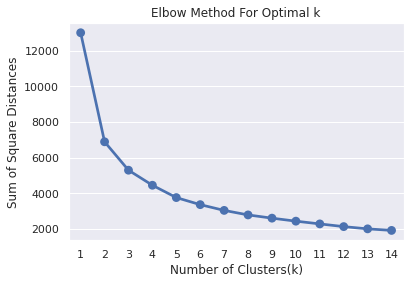

In [129]:
#applying on  'recency_log','Monetary_log', 'frequency_log'
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [130]:
def find_optimal_k(X, max_clusters=15):
    """
    Given a data matrix X, applies the elbow method to determine the optimal number of clusters.
    
    Parameters:
    -----------
    X: numpy.ndarray or pandas.DataFrame
        The data matrix to cluster.
    max_clusters: int, optional (default=15)
        The maximum number of clusters to consider.
    
    Returns:
    --------
    int
        The optimal number of clusters as determined by the elbow method.
    """
    
    sum_of_sq_dist = {}
    
    for k in range(1, max_clusters + 1):
        km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
        km = km.fit(X)
        sum_of_sq_dist[k] = km.inertia_

    sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
    plt.xlabel('Number of Clusters(k)')
    plt.ylabel('Sum of Square Distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
    # Find the optimal number of clusters based on the elbow plot
    optimal_k = 1
    for k in range(2, max_clusters + 1):
        slope = (sum_of_sq_dist[k] - sum_of_sq_dist[k-1]) / (k - (k-1))
        if slope < 0.05 * sum_of_sq_dist[1]:
            optimal_k = k
            break
            
    return optimal_k


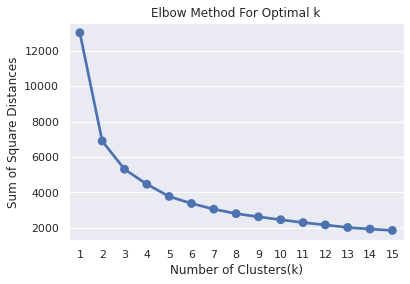

In [131]:
optimal_k = find_optimal_k(X)


 #### 2.Applying eLBOW Score Method on Recency and Monetary

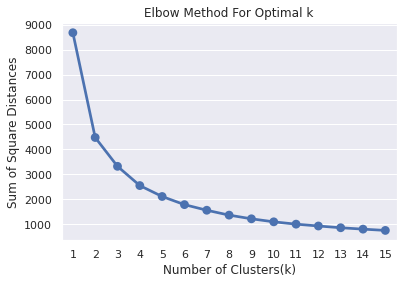

In [132]:
#
optimal_k = find_optimal_k(X1)



 #### 3.Applying Elbow Method on frequency and Monetary

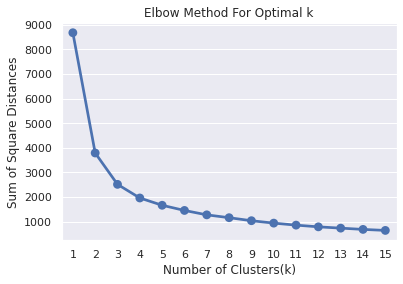

In [133]:
#
optimal_k = find_optimal_k(X2)


In [134]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X1)
y_kmeans= km.predict(X1)

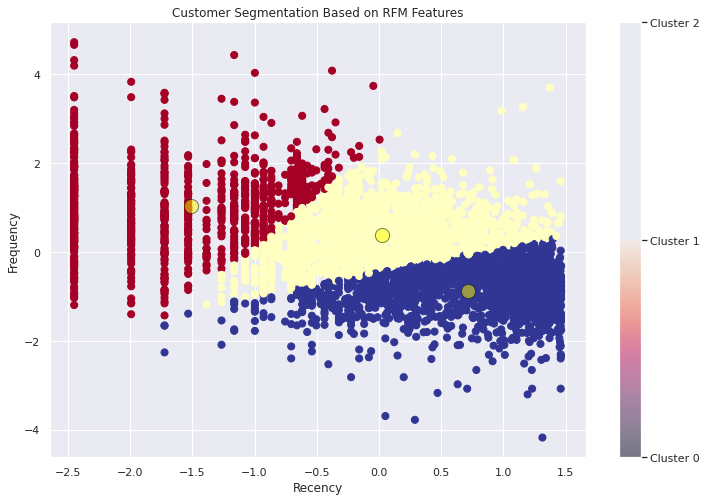

In [135]:
# Set the figure size and title for the scatter plot
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = km.cluster_centers_
cluster_centers = centers[:3]
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add a color bar to the plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The elbow method is a heuristic used to determine the optimal number of clusters, K, for a k-means clustering algorithm. It works by plotting the within-cluster sum of squares (WCSS) against the number of clusters, and selecting the number of clusters where the decrease in WCSS begins to level off or form an "elbow" shape.

The within-cluster sum of squares is the sum of the squared distances between each data point and its assigned cluster centroid. When K is small, the WCSS will be large because the clusters will be too broad and will include many dissimilar points. As K increases, the WCSS will decrease because the clusters will be more tightly focused on their respective data points. However, there comes a point where the WCSS begins to level off or decrease at a slower rate, indicating that adding more clusters is not providing significant improvement in the clustering results.

In [136]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [137]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3-Applying DBSCAN

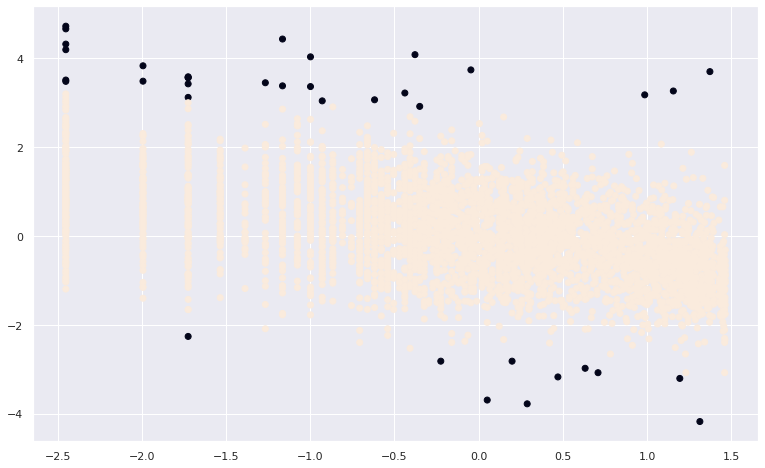

In [138]:
# ML Model - 3 Implementation
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X1)
plt.figure(figsize=(13,8))
plt.scatter(X1.iloc[:,0], X1.iloc[:,1], c=y_pred)

# Fit the Algorithm

# Predict on the model

In [139]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def dbscan_cluster(X, eps=0.5, min_samples=15):
    """
    Given a data matrix X, applies the DBSCAN clustering algorithm and returns the predicted labels.
    
    Parameters:
    -----------
    X: numpy.ndarray or pandas.DataFrame
        The data matrix to cluster.
    eps: float, optional (default=0.5)
        The maximum distance between two samples for them to be considered as in the same neighborhood.
    min_samples: int, optional (default=15)
        The number of samples in a neighborhood for a point to be considered as a core point.
    
    Returns:
    --------
    numpy.ndarray
        The predicted labels for each sample in X.
    """
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)

    plt.figure(figsize=(13,8))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_pred)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('DBSCAN Clustering')
    plt.show()
    
    return y_pred


 #### 1.Applying DBSCAN Method on Recency,frequency and Monetary

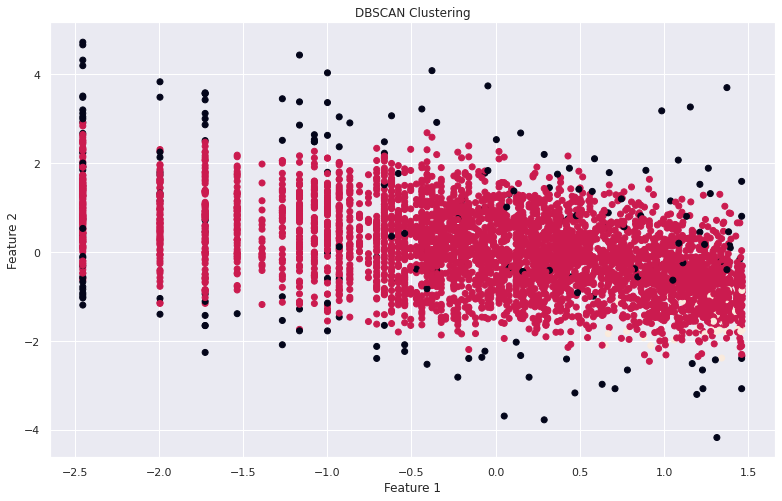

In [140]:
y_pred = dbscan_cluster(X)


 #### 2.Applying DBSCAN Method on Recency Monetary

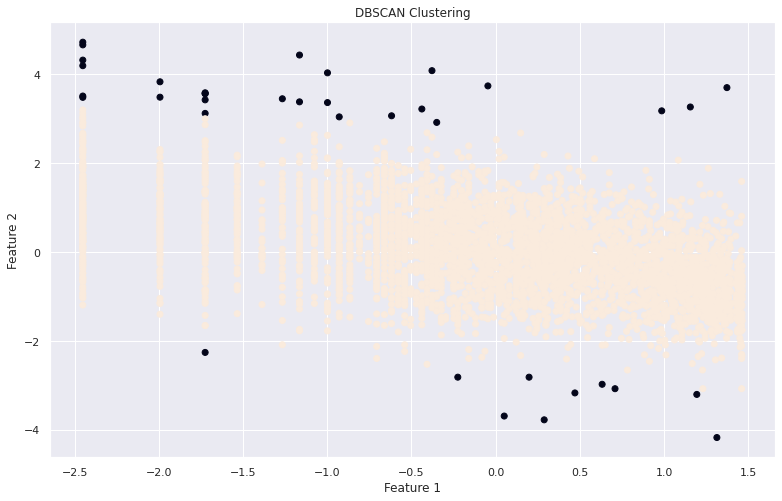

In [141]:
y_pred = dbscan_cluster(X1)


 #### 3.Applying DBSCAN Method on Recency and frequency

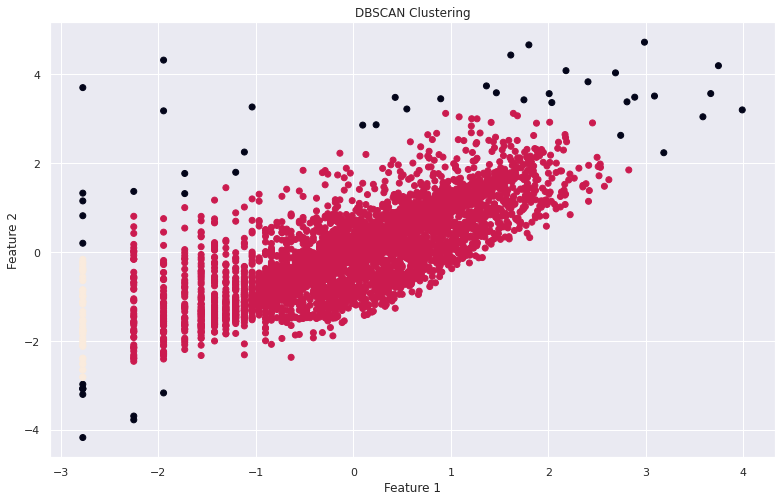

In [142]:
y_pred = dbscan_cluster(X2)


For n_clusters=2, the average silhouette score is 0.42


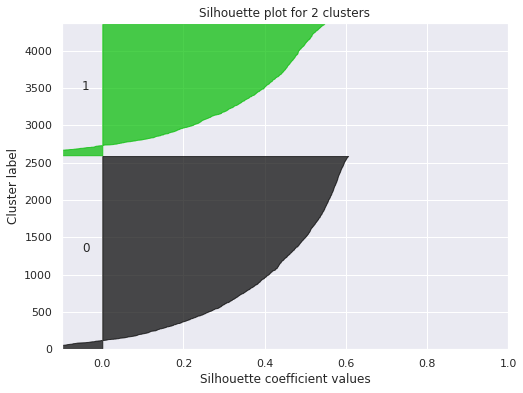

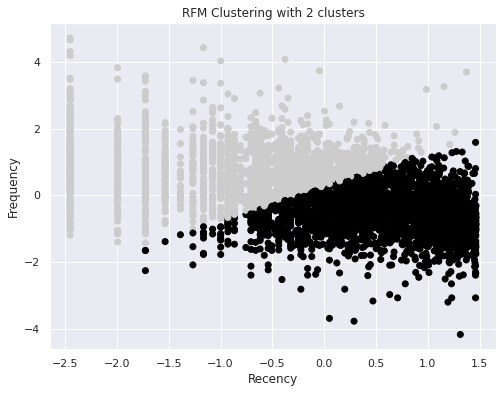

For n_clusters=3, the average silhouette score is 0.35


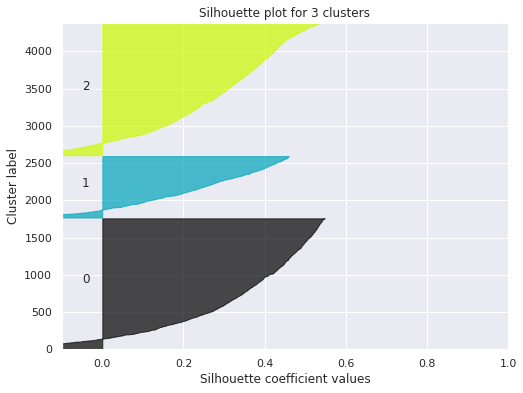

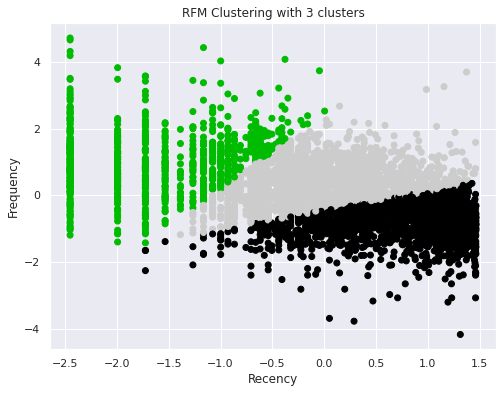

For n_clusters=4, the average silhouette score is 0.37


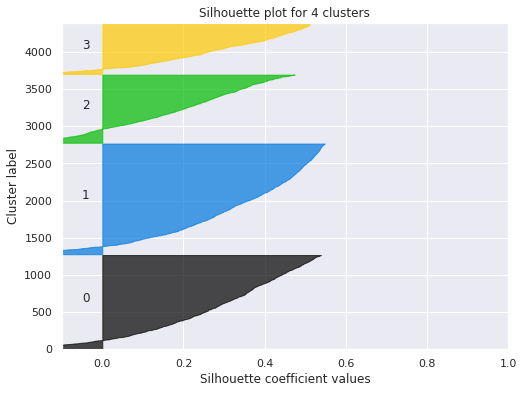

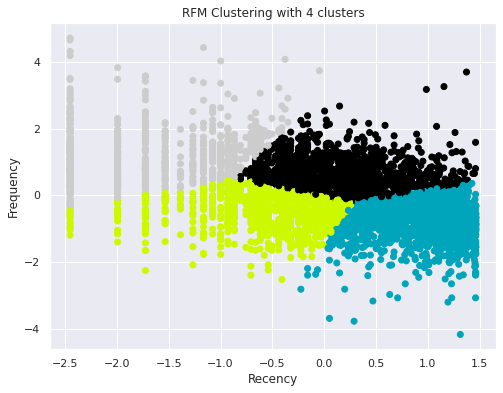

For n_clusters=5, the average silhouette score is 0.34


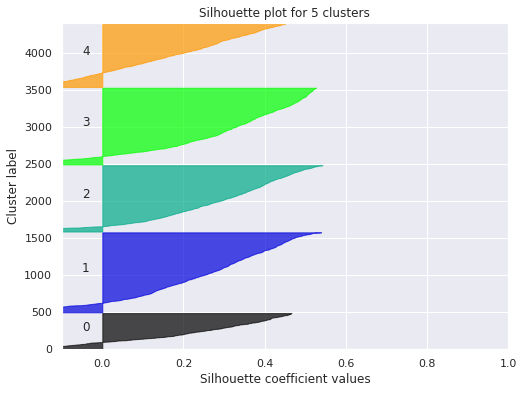

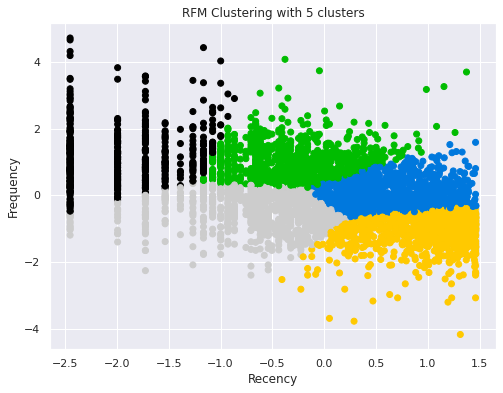

In [143]:

# Set the number of clusters to try
n_clusters_range = range(2, 6)

# Loop over the number of clusters and generate silhouette plots
for n_clusters in n_clusters_range:
    # Initialize the k-means clustering object
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X1)
    
    # Calculate the average silhouette score for the clustering
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={n_clusters}, the average silhouette score is {silhouette_avg:.2f}")
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Plot the silhouette plot
    plt.figure(figsize=(8,6))
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X1) + (n_clusters + 1) * 10])
    y_lower = 10
    
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples in cluster j
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()
        
        # Compute the size of the ith cluster
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        
        # Fill in the colors for the silhouette plot
        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plot with the cluster number at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    # Set the title and axis labels for the silhouette plot
    plt.title(f"Silhouette plot for {n_clusters} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

    # Display the plot
    plt.show()
    
    # Plot the scatter plot for the clustering
    plt.figure(figsize=(8,6))
    plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=cluster_labels, cmap='nipy_spectral')
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    plt.title(f"RFM Clustering with {n_clusters} clusters")
    
    # Display the plot
    plt.show()


DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It is a popular clustering algorithm that groups together data points that are close to each other in a high-density region, while also identifying noise points that are not part of any cluster. DBSCAN works well with datasets that have irregular shapes and varying densities, and does not require a predetermined number of clusters.

The algorithm works by defining two parameters:

Epsilon (ε): the maximum distance between two points for them to be considered as part of the same cluster.
Minimum points (MinPts): the minimum number of points required to form a dense region.
The algorithm starts with an arbitrary data point and finds all its neighboring points that are within ε distance. If the number of neighboring points is greater than or equal to MinPts, then the data point is considered as part of a cluster. The algorithm then expands the cluster by finding all the neighboring points of the current point and repeating the process until no more points can be added. If a point has fewer than MinPts neighboring points, it is considered a noise point.

### ML Model - 4-Applying Hierarchy clustering

In [144]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

def plot_dendrogram(X):
    plt.figure(figsize=(13,8))
    dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean Distances')
    plt.show()


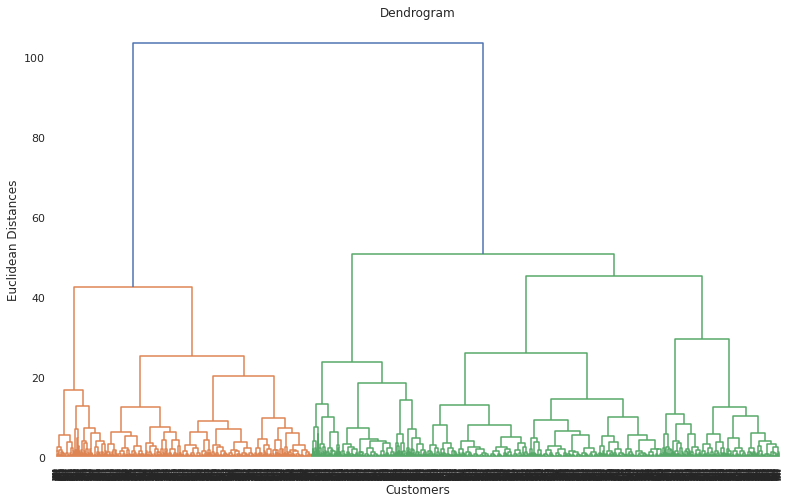

In [145]:
plot_dendrogram(X)


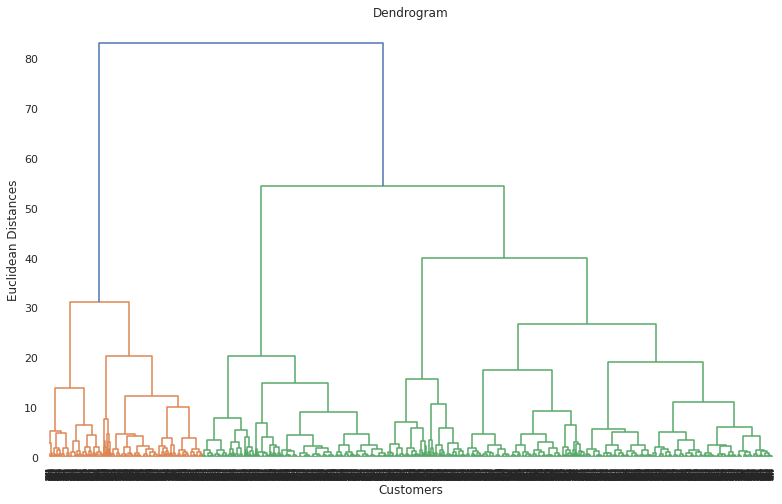

In [146]:
plot_dendrogram(X1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Hierarchical clustering is a popular unsupervised machine learning technique used to cluster similar data points together based on their attributes. Unlike k-means clustering, hierarchical clustering does not require the number of clusters to be specified in advance.

The algorithm works by constructing a hierarchy of clusters, starting with individual data points as their own clusters, and then successively merging clusters together based on their similarity. The result is a tree-like structure called a dendrogram, which shows the hierarchy of clusters and their relationships.

In [147]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [148]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [149]:
from prettytable import PrettyTable 

In [150]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['2',"K-Means with silhouette_score  ", "RM", "2"])
myTable.add_row(['3',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['4',"K-Means with Elbow methos ", "RFM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['6',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['7',"DBSCAN ", "RFM", "2"])
myTable.add_row(['8',"DBSCAN ", "FM", "2"])
myTable.add_row(['9',"DBSCAN ", "RM", "3"])
myTable.add_row(['10',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"Hierarchical clustering  ", "RM", "2"])

In [151]:
print(myTable)

+--------+---------------------------------+------+---------------------------+
| Sr No. |            Model_Name           | Data | Optimal_Number_of_cluster |
+--------+---------------------------------+------+---------------------------+
|   1    |  K-Means with silhouette_score  | RFM  |             2             |
|   2    | K-Means with silhouette_score   |  RM  |             2             |
|   3    |  K-Means with silhouette_score  |  FM  |             2             |
|   4    |    K-Means with Elbow methos    | RFM  |             2             |
|   5    |   K-Means with Elbow methos     |  RM  |             2             |
|   6    |   K-Means with Elbow methos     |  FM  |             2             |
|   7    |             DBSCAN              | RFM  |             2             |
|   8    |             DBSCAN              |  FM  |             2             |
|   9    |             DBSCAN              |  RM  |             3             |
|   10   |    Hierarchical clustering   

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 DBSCAN is a powerful clustering algorithm that can handle a wide variety of data types and shapes. If it gave you the optimal clustering result, it means that it was able to effectively identify the underlying structure in your data.

 and it has identified two optimal clusters, it suggests that there are two distinct groups in your data that can be meaningfully separated and analyzed separately.

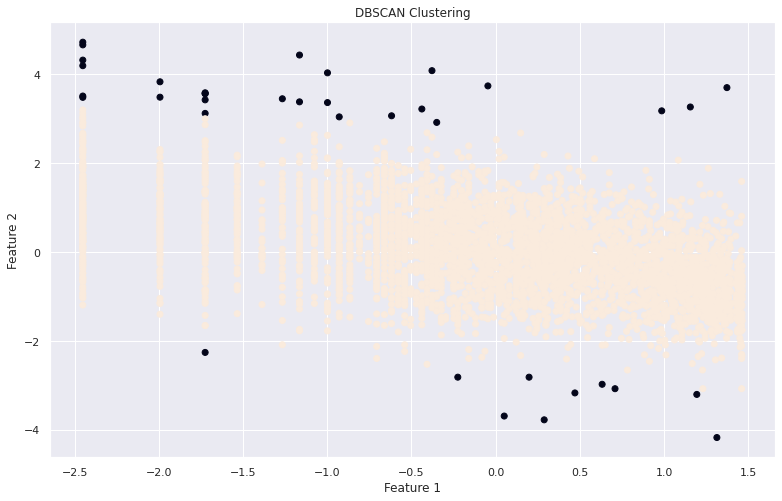

In [152]:
y_pred = dbscan_cluster(X1)

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [153]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [154]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***